# Tutorial - Data Wrangling with Pandas and Geopandas

[<< Back to Getting started with ifm](1-getting-started-with-ifm.ipynb)

[>> Next : Matplotlib Visualization](3-matplotlib-visualization.ipynb)


<ins>Topics:</ins>

**1. Pandas**
+ Import spreadsheet / csv data into notebook with pandas
+ Reshape tabular data (slicing, pivoting, resampling)
+ Simple plotting

**2. Geopandas**
+ Accessing shape files
+ Plot data on a map
+ Spatial selection 

<hr>

# Python for Environmental Modellers: Essential Libraries 

This tutorial introduces a number of essential libraries useful for environmental modelling:

**Pandas** is a library to work with tabulated data like Excel files or databases. Shape-files and other spatials data  are handled with the **Geopandas** extension.

**Matplotlib** is the common workhorse for visualization. It provides code-efficient commands to create publishing-ready figures. A number of of libraries (including Pandas or TimML) rely on matplotlib for visualization.

Other popular libraries of interest are:

+ numpy (numerical computation, support for large arrays of data)
+ scipy (scientific computation - integration, linear algebra, optimization, ...)
+ statsmodels (statistics - regression, ...)
+ scikit-learn (machine learning)

**Further Reading**: For who is interested to read more about this topic, we recommend the textbook *Python for Data Analysis* by Wes McKinney (O'Reily, ISBN 978-1-491-95766-0) 

<img src="https://images-na.ssl-images-amazon.com/images/I/81S-3ziyseL.jpg" width="250">

<hr>

## 1. PANDAS

### Loading Data

#### Import Data from files

Large datasets are usually imported from files. This example uses an Excel file.

Other input formats common to modelling can be imported in a very similar way:

    df_csv = pd.read_csv()
    df_dat = pd.read_csv(delim_whitespace=True)
    df_sql = pd.read_sql()
    df_pickle = pd.read_pickle()
    
pickle is a binary format for python objects. Useful if working with notebooks that require long processing times (allows to make intermediary saves and to avoid re-running the complete notebook after restarting Jupyter).

In [1]:
import pandas as pd
df = pd.read_excel("./example_data/drawdown_curves.xlsx")
df

ID            X           Y  Curve
0        1     0.000000  282.355087  well1
1        2     0.001000  282.360041  well1
2        3     0.202599  282.364786  well1
3        4     4.258534  282.367443  well1
4        5     8.960126  282.375180  well1
...    ...          ...         ...    ...
4963  4964  3258.268986  298.772300  well4
4964  4965  3261.021002  298.772508  well4
4965  4966  3267.344699  298.767232  well4
4966  4967  3277.942848  298.746713  well4
4967  4968  3286.999986  298.718554  well4

[4968 rows x 4 columns]

In [2]:
# dataframe provides some methods e.g. for data exploration:
df.describe()

ID            X            Y
count  4968.000000  4968.000000  4968.000000
mean   2484.500000  1700.799433   291.581078
std    1434.282399   978.678132     7.063675
min       1.000000     0.000000   277.026027
25%    1242.750000   821.999998   284.790000
50%    2484.500000  1756.432161   291.997790
75%    3726.250000  2586.999991   298.613227
max    4968.000000  3286.999986   304.306332

***

#### Export Data 

In [3]:
# Saving to files works the other way around:
df.to_csv("./example_data/drawdown_curves.csv")

***

#### Converting Stacked tables

The XLSX file contains time series that have been exported from the FEFLOW GUI. 

It has the form of a stacked table, meaning that data of all times and observation points appear in the same table. This is a quite common format in model outputs in general, however not really useful for processing.

Pandas provides an in-built function to tabulate the data with an individual column per observation bore. This is done by using the `pivot`-function

**Note:** this is useful if all observation points share the same time steps (as they usually do in model output). For measurement data with usually asynchrounous data, the data should be resampled (see below) if tabulation is required.

In [4]:
# to tabulate the data, provide the names of the columns that contain the index (here: X, time), the values (here: Y)
# and the columns (here: curve)
df_pivot = df.pivot(index="X", values="Y", columns="Curve")
df_pivot.index.name = "Time"

In [5]:
df_pivot

Curve             well1       well2       well3       well4       well5  \
Time                                                                      
0.000000     282.355087  284.927644  287.622602  304.253642  301.389564   
0.001000     282.360041  284.932594  287.627552  304.258596  301.394516   
0.202599     282.364786  284.937580  287.632981  304.263494  301.399505   
4.258534     282.367443  284.943866  287.650610  304.267792  301.400036   
8.960126     282.375180  284.951206  287.666750  304.271265  301.397205   
...                 ...         ...         ...         ...         ...   
3258.268986  277.172593  280.358881  281.588717  298.772300  295.065743   
3261.021002  277.157283  280.347341  281.552457  298.772508  295.043035   
3267.344699  277.123304  280.320481  281.486608  298.767232  294.985092   
3277.942848  277.070232  280.277484  281.413812  298.746713  294.865767   
3286.999986  277.026027  280.241702  281.367469  298.718554  294.759295   

Curve             well6       well7       well8       well9  
Time                                                         
0.000000     300.247835  295.997291  293.399888  290.918312  
0.001000     300.252795  296.002262  293.404844  290.923290  
0.202599     300.256153  296.007872  293.410269  290.928536  
4.258534     300.228460  296.019664  293.424332  290.936270  
8.960126     300.192611  296.029670  293.438521  290.944202  
...                 ...         ...         ...         ...  
3258.268986  292.623585  291.275982  287.210070  284.265134  
3261.021002  292.600980  291.270561  287.194123  284.255554  
3267.344699  292.555157  291.256507  287.158171  284.230218  
3277.942848  292.488214  291.235146  287.101410  284.178302  
3286.999986  292.432617  291.219048  287.054549  284.125843  

[552 rows x 9 columns]

***

#### Resampling

To resample a DataFrame (or DataSeries), its index field must be of type DateTime.

In [6]:
# example: datetime objects
from datetime import datetime
from datetime import timedelta

datetime(2018, 1, 1) + timedelta(days=1.2)

datetime.datetime(2018, 1, 2, 4, 48)

To convert the index axis from a time to a calendar axis, we create a new column of type DateTime and set it as the new index:

In [7]:
# create a new column
df_pivot["Calendar"] = pd.to_datetime(df_pivot.index, unit="D", origin=datetime(2018, 1, 1))

In [8]:
# set calendar as new index
df_pivot.set_index("Calendar", inplace=True)
df_pivot

Curve                               well1       well2       well3       well4  \
Calendar                                                                        
2018-01-01 00:00:00.000000000  282.355087  284.927644  287.622602  304.253642   
2018-01-01 00:01:26.400000000  282.360041  284.932594  287.627552  304.258596   
2018-01-01 04:51:44.574336000  282.364786  284.937580  287.632981  304.263494   
2018-01-05 06:12:17.350214400  282.367443  284.943866  287.650610  304.267792   
2018-01-09 23:02:34.896336000  282.375180  284.951206  287.666750  304.271265   
...                                   ...         ...         ...         ...   
2026-12-03 06:27:20.377008000  277.172593  280.358881  281.588717  298.772300   
2026-12-06 00:30:14.606409600  277.157283  280.347341  281.552457  298.772508   
2026-12-12 08:16:22.035072000  277.123304  280.320481  281.486608  298.767232   
2026-12-22 22:37:42.052080000  277.070232  280.277484  281.413812  298.746713   
2026-12-31 23:59:58.813555200  277.026027  280.241702  281.367469  298.718554   

Curve                               well5       well6       well7       well8  \
Calendar                                                                        
2018-01-01 00:00:00.000000000  301.389564  300.247835  295.997291  293.399888   
2018-01-01 00:01:26.400000000  301.394516  300.252795  296.002262  293.404844   
2018-01-01 04:51:44.574336000  301.399505  300.256153  296.007872  293.410269   
2018-01-05 06:12:17.350214400  301.400036  300.228460  296.019664  293.424332   
2018-01-09 23:02:34.896336000  301.397205  300.192611  296.029670  293.438521   
...                                   ...         ...         ...         ...   
2026-12-03 06:27:20.377008000  295.065743  292.623585  291.275982  287.210070   
2026-12-06 00:30:14.606409600  295.043035  292.600980  291.270561  287.194123   
2026-12-12 08:16:22.035072000  294.985092  292.555157  291.256507  287.158171   
2026-12-22 22:37:42.052080000  294.865767  292.488214  291.235146  287.101410   
2026-12-31 23:59:58.813555200  294.759295  292.432617  291.219048  287.054549   

Curve                               well9  
Calendar                                   
2018-01-01 00:00:00.000000000  290.918312  
2018-01-01 00:01:26.400000000  290.923290  
2018-01-01 04:51:44.574336000  290.928536  
2018-01-05 06:12:17.350214400  290.936270  
2018-01-09 23:02:34.896336000  290.944202  
...                                   ...  
2026-12-03 06:27:20.377008000  284.265134  
2026-12-06 00:30:14.606409600  284.255554  
2026-12-12 08:16:22.035072000  284.230218  
2026-12-22 22:37:42.052080000  284.178302  
2026-12-31 23:59:58.813555200  284.125843  

[552 rows x 9 columns]

The actual resampling is done with the `resample` method. The first argument is the resampling rule (`D` stands for Daily values). The method returns an object, on that we need to apply a accumulation operation. In this case, we use the `mean` value of all measured heads in a day, which makes sense for head measurements.

(A different option would be `.resample("D").sum()`, for example when downsampling rainfall or pumping rates).

In [9]:
df_pivot.resample("D").mean()

Curve            well1       well2       well3       well4       well5  \
Calendar                                                                 
2018-01-01  282.359971  284.932606  287.627712  304.258577  301.394528   
2018-01-02         NaN         NaN         NaN         NaN         NaN   
2018-01-03         NaN         NaN         NaN         NaN         NaN   
2018-01-04         NaN         NaN         NaN         NaN         NaN   
2018-01-05  282.367443  284.943866  287.650610  304.267792  301.400036   
...                ...         ...         ...         ...         ...   
2026-12-27         NaN         NaN         NaN         NaN         NaN   
2026-12-28         NaN         NaN         NaN         NaN         NaN   
2026-12-29         NaN         NaN         NaN         NaN         NaN   
2026-12-30         NaN         NaN         NaN         NaN         NaN   
2026-12-31  277.026027  280.241702  281.367469  298.718554  294.759295   

Curve            well6       well7       well8       well9  
Calendar                                                    
2018-01-01  300.252261  296.002475  293.405000  290.923379  
2018-01-02         NaN         NaN         NaN         NaN  
2018-01-03         NaN         NaN         NaN         NaN  
2018-01-04         NaN         NaN         NaN         NaN  
2018-01-05  300.228460  296.019664  293.424332  290.936270  
...                ...         ...         ...         ...  
2026-12-27         NaN         NaN         NaN         NaN  
2026-12-28         NaN         NaN         NaN         NaN  
2026-12-29         NaN         NaN         NaN         NaN  
2026-12-30         NaN         NaN         NaN         NaN  
2026-12-31  292.432617  291.219048  287.054549  284.125843  

[3287 rows x 9 columns]

In [10]:
# remove gaps by dropping all rows that contain NaN values
df_pivot.resample("D").mean().dropna()

Curve            well1       well2       well3       well4       well5  \
Calendar                                                                 
2018-01-01  282.359971  284.932606  287.627712  304.258577  301.394528   
2018-01-05  282.367443  284.943866  287.650610  304.267792  301.400036   
2018-01-09  282.375180  284.951206  287.666750  304.271265  301.397205   
2018-01-24  282.394242  284.965800  287.690480  304.272639  301.384416   
2018-02-01  282.405692  284.977688  287.704025  304.279076  301.388351   
...                ...         ...         ...         ...         ...   
2026-12-03  277.172593  280.358881  281.588717  298.772300  295.065743   
2026-12-06  277.157283  280.347341  281.552457  298.772508  295.043035   
2026-12-12  277.123304  280.320481  281.486608  298.767232  294.985092   
2026-12-22  277.070232  280.277484  281.413812  298.746713  294.865767   
2026-12-31  277.026027  280.241702  281.367469  298.718554  294.759295   

Curve            well6       well7       well8       well9  
Calendar                                                    
2018-01-01  300.252261  296.002475  293.405000  290.923379  
2018-01-05  300.228460  296.019664  293.424332  290.936270  
2018-01-09  300.192611  296.029670  293.438521  290.944202  
2018-01-24  300.113945  296.048758  293.467275  290.960225  
2018-02-01  300.095159  296.061460  293.483763  290.972839  
...                ...         ...         ...         ...  
2026-12-03  292.623585  291.275982  287.210070  284.265134  
2026-12-06  292.600980  291.270561  287.194123  284.255554  
2026-12-12  292.555157  291.256507  287.158171  284.230218  
2026-12-22  292.488214  291.235146  287.101410  284.178302  
2026-12-31  292.432617  291.219048  287.054549  284.125843  

[439 rows x 9 columns]

In [11]:
df_pivot.resample("D").mean().interpolate()

Curve            well1       well2       well3       well4       well5  \
Calendar                                                                 
2018-01-01  282.359971  284.932606  287.627712  304.258577  301.394528   
2018-01-02  282.361839  284.935421  287.633436  304.260881  301.395905   
2018-01-03  282.363707  284.938236  287.639161  304.263184  301.397282   
2018-01-04  282.365575  284.941051  287.644886  304.265488  301.398659   
2018-01-05  282.367443  284.943866  287.650610  304.267792  301.400036   
...                ...         ...         ...         ...         ...   
2026-12-27  277.045674  280.257605  281.388066  298.731069  294.806616   
2026-12-28  277.040762  280.253630  281.382917  298.727940  294.794785   
2026-12-29  277.035851  280.249654  281.377768  298.724811  294.782955   
2026-12-30  277.030939  280.245678  281.372619  298.721682  294.771125   
2026-12-31  277.026027  280.241702  281.367469  298.718554  294.759295   

Curve            well6       well7       well8       well9  
Calendar                                                    
2018-01-01  300.252261  296.002475  293.405000  290.923379  
2018-01-02  300.246311  296.006772  293.409833  290.926602  
2018-01-03  300.240360  296.011070  293.414666  290.929825  
2018-01-04  300.234410  296.015367  293.419499  290.933047  
2018-01-05  300.228460  296.019664  293.424332  290.936270  
...                ...         ...         ...         ...  
2026-12-27  292.457327  291.226202  287.075376  284.149158  
2026-12-28  292.451150  291.224414  287.070169  284.143329  
2026-12-29  292.444972  291.222625  287.064962  284.137501  
2026-12-30  292.438795  291.220836  287.059755  284.131672  
2026-12-31  292.432617  291.219048  287.054549  284.125843  

[3287 rows x 9 columns]

***

### Selecting Data

Large tabulated data sets often have impractibly large numbers of columns. You can either save and open them in Excel, or print the whole table in a jupyter notebook with the following command:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_pivot)


#### Choosing columns 

In [13]:
# choose a single column (returns a DataSeries)
df_pivot["well1"]

Calendar
2018-01-01 00:00:00.000000000    282.355087
2018-01-01 00:01:26.400000000    282.360041
2018-01-01 04:51:44.574336000    282.364786
2018-01-05 06:12:17.350214400    282.367443
2018-01-09 23:02:34.896336000    282.375180
                                    ...    
2026-12-03 06:27:20.377008000    277.172593
2026-12-06 00:30:14.606409600    277.157283
2026-12-12 08:16:22.035072000    277.123304
2026-12-22 22:37:42.052080000    277.070232
2026-12-31 23:59:58.813555200    277.026027
Name: well1, Length: 552, dtype: float64

In [14]:
# alternative syntax to choose a single column
df_pivot.well1

Calendar
2018-01-01 00:00:00.000000000    282.355087
2018-01-01 00:01:26.400000000    282.360041
2018-01-01 04:51:44.574336000    282.364786
2018-01-05 06:12:17.350214400    282.367443
2018-01-09 23:02:34.896336000    282.375180
                                    ...    
2026-12-03 06:27:20.377008000    277.172593
2026-12-06 00:30:14.606409600    277.157283
2026-12-12 08:16:22.035072000    277.123304
2026-12-22 22:37:42.052080000    277.070232
2026-12-31 23:59:58.813555200    277.026027
Name: well1, Length: 552, dtype: float64

In [15]:
# choose multiple columns
df_pivot[["well1", "well2"]]

Curve                               well1       well2
Calendar                                             
2018-01-01 00:00:00.000000000  282.355087  284.927644
2018-01-01 00:01:26.400000000  282.360041  284.932594
2018-01-01 04:51:44.574336000  282.364786  284.937580
2018-01-05 06:12:17.350214400  282.367443  284.943866
2018-01-09 23:02:34.896336000  282.375180  284.951206
...                                   ...         ...
2026-12-03 06:27:20.377008000  277.172593  280.358881
2026-12-06 00:30:14.606409600  277.157283  280.347341
2026-12-12 08:16:22.035072000  277.123304  280.320481
2026-12-22 22:37:42.052080000  277.070232  280.277484
2026-12-31 23:59:58.813555200  277.026027  280.241702

[552 rows x 2 columns]

#### Choosing Rows

What works for columns also works for rows by using the `loc` function

In [16]:
# Fith entry (integer-type index)
df.loc[5]

ID             6
X         23.956
Y        282.394
Curve      well1
Name: 5, dtype: object

#### Slicing by integer-type index
Because the index column is ordered, it allows to provide ranges. This is called slicing. 

In [17]:
# first 5 entries (integer-type index)
df.loc[:5]

ID          X           Y  Curve
0   1   0.000000  282.355087  well1
1   2   0.001000  282.360041  well1
2   3   0.202599  282.364786  well1
3   4   4.258534  282.367443  well1
4   5   8.960126  282.375180  well1
5   6  23.955970  282.394242  well1

In [18]:
# alternatively
df[:5]

ID         X           Y  Curve
0   1  0.000000  282.355087  well1
1   2  0.001000  282.360041  well1
2   3  0.202599  282.364786  well1
3   4  4.258534  282.367443  well1
4   5  8.960126  282.375180  well1

In [19]:
# returns the first n rows of the dataframe
n = 7
df_pivot.head(n) 

Curve                               well1       well2       well3       well4  \
Calendar                                                                        
2018-01-01 00:00:00.000000000  282.355087  284.927644  287.622602  304.253642   
2018-01-01 00:01:26.400000000  282.360041  284.932594  287.627552  304.258596   
2018-01-01 04:51:44.574336000  282.364786  284.937580  287.632981  304.263494   
2018-01-05 06:12:17.350214400  282.367443  284.943866  287.650610  304.267792   
2018-01-09 23:02:34.896336000  282.375180  284.951206  287.666750  304.271265   
2018-01-24 22:56:35.808172800  282.394242  284.965800  287.690480  304.272639   
2018-02-01 00:00:00.016588800  282.403215  284.975212  287.701550  304.276599   

Curve                               well5       well6       well7       well8  \
Calendar                                                                        
2018-01-01 00:00:00.000000000  301.389564  300.247835  295.997291  293.399888   
2018-01-01 00:01:26.400000000  301.394516  300.252795  296.002262  293.404844   
2018-01-01 04:51:44.574336000  301.399505  300.256153  296.007872  293.410269   
2018-01-05 06:12:17.350214400  301.400036  300.228460  296.019664  293.424332   
2018-01-09 23:02:34.896336000  301.397205  300.192611  296.029670  293.438521   
2018-01-24 22:56:35.808172800  301.384416  300.113945  296.048758  293.467275   
2018-02-01 00:00:00.016588800  301.385875  300.092671  296.058983  293.481285   

Curve                               well9  
Calendar                                   
2018-01-01 00:00:00.000000000  290.918312  
2018-01-01 00:01:26.400000000  290.923290  
2018-01-01 04:51:44.574336000  290.928536  
2018-01-05 06:12:17.350214400  290.936270  
2018-01-09 23:02:34.896336000  290.944202  
2018-01-24 22:56:35.808172800  290.960225  
2018-02-01 00:00:00.016588800  290.970359

#### Slicing by datetime
A datetime-axis can be conveniently addressed by using ISO-Datestrings:

In [20]:
# choose all rows of May 2018
df_pivot["2018-05-01":"2018-05-30"]

Curve                               well1       well2       well3       well4  \
Calendar                                                                        
2018-05-02 23:59:59.939779200  282.498151  285.078269  287.893906  303.981846   
2018-05-02 23:59:59.950320000  282.503105  285.083220  287.898859  303.986794   
2018-05-10 00:27:51.959577600  282.510652  285.084271  287.910340  303.962791   
2018-05-17 00:55:43.968835200  282.519070  285.082633  287.924961  303.924481   

Curve                               well5       well6       well7       well8  \
Calendar                                                                        
2018-05-02 23:59:59.939779200  301.432402  299.912952  296.100010  293.650480   
2018-05-02 23:59:59.950320000  301.437353  299.917923  296.104963  293.655438   
2018-05-10 00:27:51.959577600  301.432585  299.910520  296.091215  293.664463   
2018-05-17 00:55:43.968835200  301.421295  299.897243  296.067523  293.675404   

Curve                               well9  
Calendar                                   
2018-05-02 23:59:59.939779200  291.107436  
2018-05-02 23:59:59.950320000  291.112397  
2018-05-10 00:27:51.959577600  291.118970  
2018-05-17 00:55:43.968835200  291.126169

In [21]:
# alternatively datetime objects can be used
df_pivot[datetime(2018,5,1):datetime(2018,5,30)]

Curve                               well1       well2       well3       well4  \
Calendar                                                                        
2018-05-02 23:59:59.939779200  282.498151  285.078269  287.893906  303.981846   
2018-05-02 23:59:59.950320000  282.503105  285.083220  287.898859  303.986794   
2018-05-10 00:27:51.959577600  282.510652  285.084271  287.910340  303.962791   
2018-05-17 00:55:43.968835200  282.519070  285.082633  287.924961  303.924481   

Curve                               well5       well6       well7       well8  \
Calendar                                                                        
2018-05-02 23:59:59.939779200  301.432402  299.912952  296.100010  293.650480   
2018-05-02 23:59:59.950320000  301.437353  299.917923  296.104963  293.655438   
2018-05-10 00:27:51.959577600  301.432585  299.910520  296.091215  293.664463   
2018-05-17 00:55:43.968835200  301.421295  299.897243  296.067523  293.675404   

Curve                               well9  
Calendar                                   
2018-05-02 23:59:59.939779200  291.107436  
2018-05-02 23:59:59.950320000  291.112397  
2018-05-10 00:27:51.959577600  291.118970  
2018-05-17 00:55:43.968835200  291.126169

***
#### Complex indexing

For more complex indexing, please see the following commands

+ `DataFrame.at[]`: Access a single value for a row/column label pair
+ `DataFrame.loc[]`: Access group of rows and columns by labels (or boolean arrays)
+ `DataFrame.iloc[]`: Access group of rows and columns by integer position(s)
+ `DataFrame.xs[]`: Returns a cross-section (row(s) or column(s)) from the Series/DataFrame.

**Note:** To assign data to slices of a dataframe, .loc[] must be used!

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html


***

### Simple plotting

Pandas provides easy access to matplotlib-style plotting. 

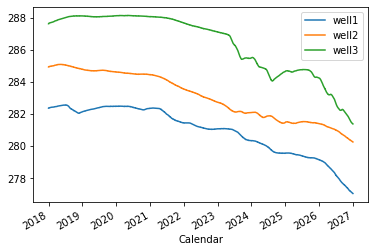

In [22]:
# tell Jupyter to show all graphics in-line:
%matplotlib inline

# create a basic plot of a time series
df_pivot.well1.plot()
df_pivot.well2.plot()
df_pivot.well3.plot()


import matplotlib.pyplot as plt
plt.legend()  # add a legend to the plot

In [23]:
# export the dataframe to an excel sheet
df_pivot.to_excel("./example_data/df_pivot.xlsx")

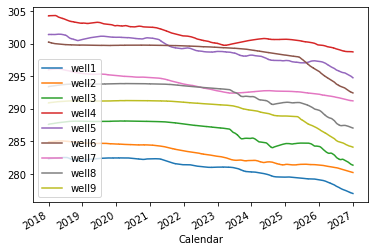

In [24]:
# method chaining - read excel sheet, set index and plot in one go
pd.read_excel("./example_data/df_pivot.xlsx").set_index("Calendar").plot()

***

## 2. Geopandas

Geopandas adds a spatial relation to a DataFrame, which then becomes a GeoDataFrame.
In addition to the index-column, a GeoDataFrame has a geometry column that contains a geometry (points, line, polygon). Note that GeoPandas is 2D. 

###   Accessing shp-files

If you know how a shape file looks like from the inside, you know what a GeoDataFrame is:

In [25]:
import geopandas as gpd
gdf_isolines = gpd.read_file("./example_data/isolines_final_head.shp")
gdf_isolines

ISOLINE      F                                           geometry
0        2  479.0  MULTILINESTRING ((520202.794 7499857.342, 5201...
1        5  483.0  LINESTRING (519057.884 7500724.131, 519101.872...
2        7  477.0  MULTILINESTRING ((520851.023 7499882.828, 5208...
3        9  481.0  MULTILINESTRING ((519976.098 7499799.998, 5199...
4       13  482.0  LINESTRING (519394.310 7499809.556, 519399.201...
5        0    0.0  LINESTRING (524200.903 7501772.448, 524188.771...
6        0    0.0  LINESTRING (524513.753 7499965.386, 524480.399...

In [26]:
gdf_points = gpd.read_file("./example_data/points.shp")
gdf_points

NODE           X            Y       FINIT FINIT_U  \
0     23  522777.689  7501492.124  495.455196       m   
1     35  521016.800  7500859.167  494.764415       m   
2     36  521660.900  7499993.000  495.163527       m   
3     50  520905.100  7500015.000  495.178737       m   
4     61  520268.800  7499896.000  495.454282       m   
5     67  521935.010  7501093.660  494.905555       m   
6     70  522244.186  7501039.629  495.158911       m   
7     81  523685.647  7500891.147  496.680806       m   
8     86  521740.300  7500808.830  494.966934       m   
9     99  521878.352  7500670.231  495.168131       m   
10   100  522776.146  7501496.149  495.453720       m   

                          geometry  
0   POINT (522777.689 7501492.124)  
1   POINT (521016.800 7500859.167)  
2   POINT (522310.791 7500235.116)  
3   POINT (520726.698 7500339.946)  
4   POINT (520268.800 7499896.000)  
5   POINT (521935.010 7501093.660)  
6   POINT (522244.186 7501039.629)  
7   POINT (523685.647 7500891.147)  
8   POINT (521536.412 7501050.946)  
9   POINT (521674.464 7500912.347)  
10  POINT (522776.146 7501496.149)

this is not very pretty - the actual idea with a GeoDataFrame is to show it on a map: 

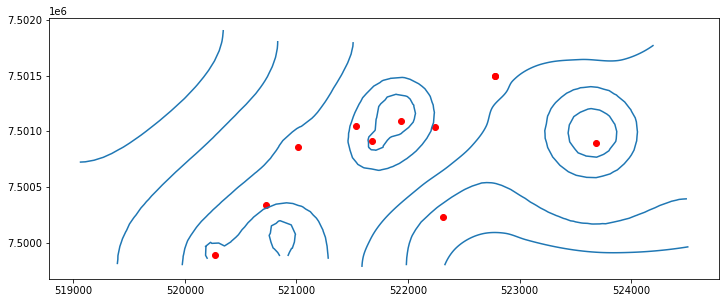

In [27]:
%matplotlib inline
ax1 = gdf_isolines.plot(figsize=(12,6))
gdf_points.plot(ax=ax1, color="red")

###  Spatial Selection

Where DataFrames allows slicing by value (`DataFrame.loc`) or index (`DataFrame.iloc`), a GeoDataFrame adds spatial slicing (`GeoDataFrame.cx`) to choose elements in a certain range of x- and y- coordinates.

For more complex spatial selections see http://geopandas.org/set_operations.html how to use overlays and set operations.

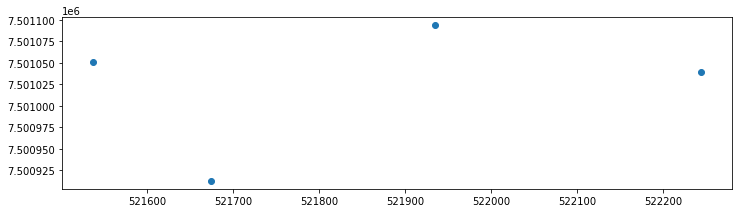

In [28]:
# select all elements with 521000 < x < 523000
gdf_points.cx[521500:522250,:].plot(figsize=(12, 6))